Exploring Automobile mpg Dataset with Python

In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
automobile_df=pd.read_csv('auto-mpg.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
132,25.0,4,140.0,75,2542,17.0,74,1,chevrolet vega
143,26.0,4,97.0,78,2300,14.5,74,2,opel manta
355,33.7,4,107.0,75,2210,14.4,81,3,honda prelude
113,21.0,6,155.0,107,2472,14.0,73,1,mercury capri v6


In [3]:
automobile_df.shape

(398, 9)

Treat spaces denoted by ? in the dataset to mean nan(not a number)

In [4]:
automobile_df=automobile_df.replace('?',np.nan)

Use dropna() function to remove a row or column which has a NAN or no values in it.

In [5]:
automobile_df=automobile_df.dropna()

In [6]:
automobile_df.shape

(392, 9)

Drop columns which don't make sense as features. ie. feature selection or feature engineering.

In [7]:
automobile_df.drop(['origin', 'car name'], axis=1,inplace=True)

In [8]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
267,27.5,4,134.0,95,2560,14.2,78
150,26.0,4,108.0,93,2391,15.5,74
130,26.0,4,122.0,80,2451,16.5,74
357,32.9,4,119.0,100,2615,14.8,81
165,20.0,8,262.0,110,3221,13.5,75


In [9]:
automobile_df['model year']='19'+ automobile_df['model year'].astype(str)

In [10]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
284,20.6,6,225.0,110,3360,16.6,1979
92,13.0,8,351.0,158,4363,13.0,1973
378,38.0,4,105.0,63,2125,14.7,1982
169,20.0,6,232.0,100,2914,16.0,1975
339,26.6,4,151.0,84,2635,16.4,1981


Convert the model year to a complete year format.

# Calculate and add Age column

In [11]:
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [12]:
automobile_df.drop(['model year'], axis=1, inplace=True)

In [13]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
43,13.0,8,400.0,170,4746,12.0,48
307,26.8,6,173.0,115,2700,12.9,40
19,26.0,4,97.0,46,1835,20.5,49
111,18.0,3,70.0,90,2124,13.5,46
92,13.0,8,351.0,158,4363,13.0,46


In [14]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [15]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
age             392 non-null int64
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


Note that horsepower is object type(characters), we need to convert this to numeric type.

In [16]:
automobile_df['horsepower']=pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [17]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
age             392 non-null int64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


In [18]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,43.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,37.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,40.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,43.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,46.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,49.000000


Visualizing Relationship


Text(0, 0.5, 'Miles per gallon')

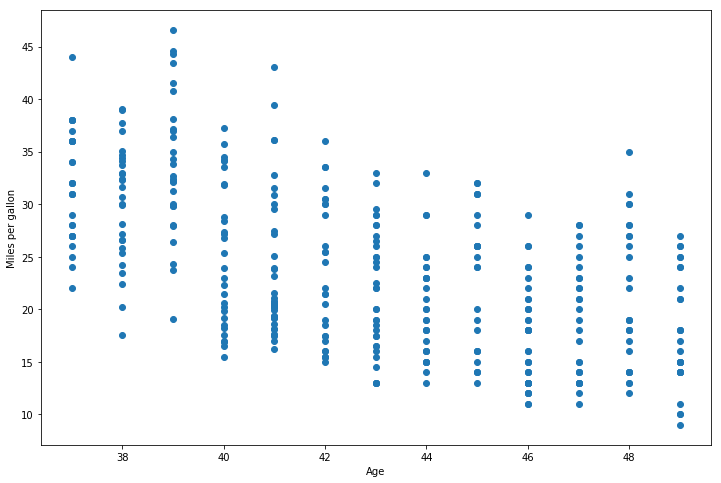

In [19]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['age'], automobile_df['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Cars with lower age have higher mpg than cars with longer age.

Text(0, 0.5, 'Miles per gallon')

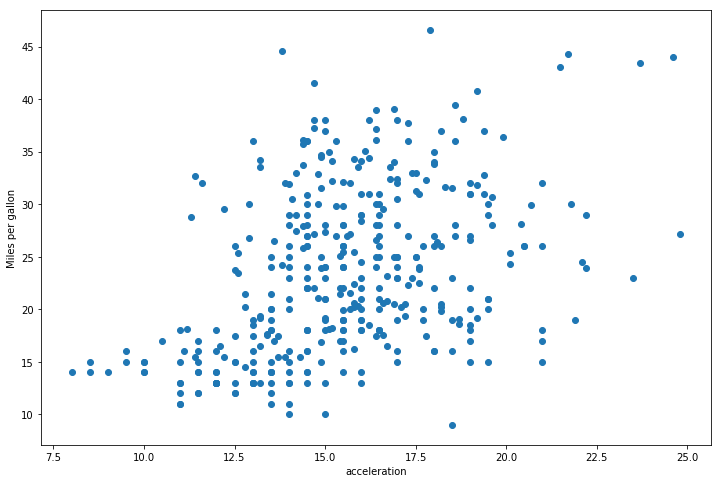

In [20]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

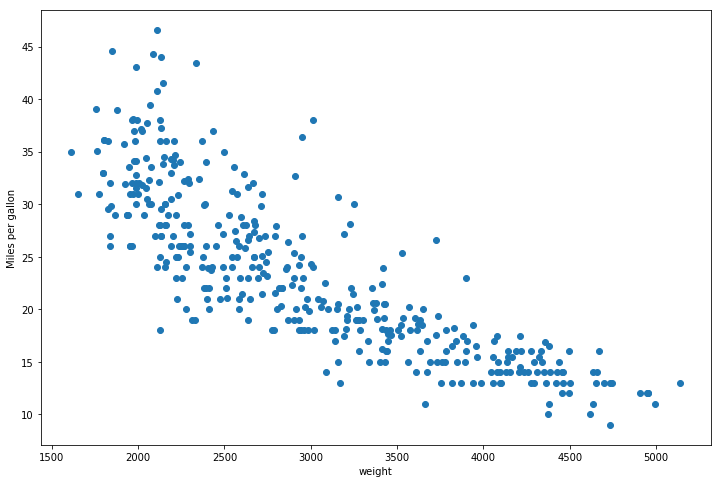

In [21]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

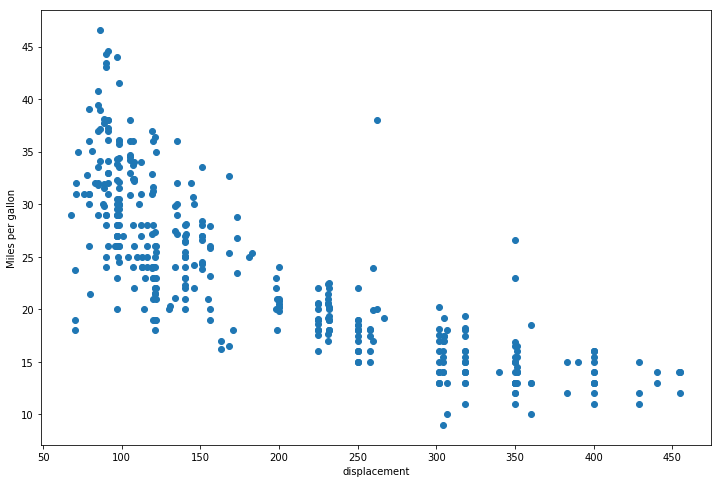

In [22]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('displacement')
plt.ylabel('Miles per gallon')

Cars with greater displacement from the ground have lower mpgs.

Text(0, 0.5, 'Miles per gallon')

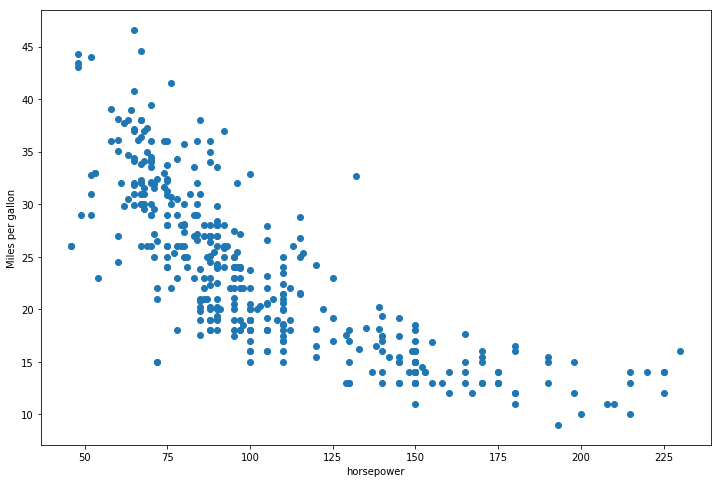

In [23]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('horsepower')
plt.ylabel('Miles per gallon')

cars with greater horsepower (the rate at which the engine work/speed) have lower mpg (burns fuel faster)

Text(0, 0.5, 'Miles per gallon')

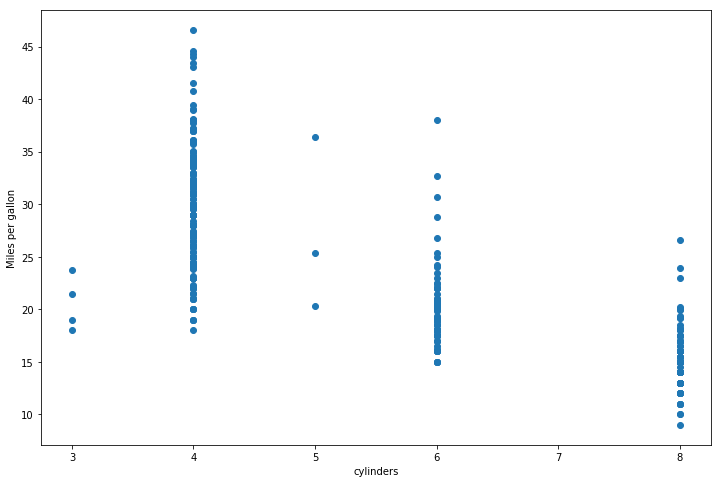

In [24]:
fix,ax=plt.subplots(figsize=(12,8))

plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])

plt.xlabel('cylinders')
plt.ylabel('Miles per gallon')

Cars with lower cylinders have higher mpg(fuel economy)

Acylinder is the power unit of an engine. it's the chamber where the gasoline is burned and turned into power. Most cars and SUV engines have four, six

correation of the different features in our dataset.

In [25]:
automobile_corr=automobile_df.corr()

automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


Heatmap: the graphical format of the correlations between variables.

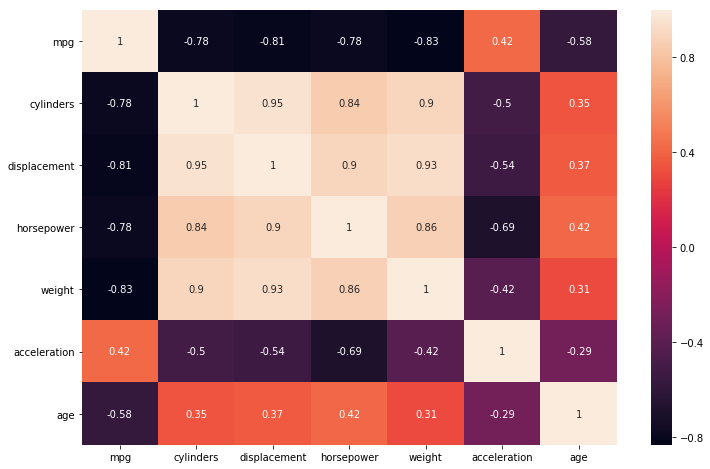

In [26]:
fig, ax=plt.subplots(figsize=(12,8))

sns.heatmap(automobile_corr, annot=True)

In [27]:
reset or reshuffle our index to make our  dataframe machine learning ready

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  or, please run `%reset?` for details
Don't know how to reset  reshuffle, please run `%reset?` for details
Don't know how to reset  our, please run `%reset?` for details
Don't know how to reset  index, please run `%reset?` for details
Don't know how to reset  to, please run `%reset?` for details
Don't know how to reset  make, please run `%reset?` for details
Don't know how to reset  our, please run `%reset?` for details
Don't know how to reset  dataframe, please run `%reset?` for details
Don't know how to reset  machine, please run `%reset?` for details
Don't know how to reset  learning, please run `%reset?` for details
Don't know how to reset  ready, please run `%reset?` for details


In [28]:
automobile_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,49
1,15.0,8,350.0,165,3693,11.5,49
2,18.0,8,318.0,150,3436,11.0,49
3,16.0,8,304.0,150,3433,12.0,49
4,17.0,8,302.0,140,3449,10.5,49


In [29]:
automobile_df=automobile_df.sample(frac=1).reset_index(drop=True)

automobile_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,25.4,6,168.0,116,2900,12.6,38
1,23.0,6,198.0,95,2904,16.0,46
2,19.2,6,231.0,105,3535,19.2,41
3,13.0,8,400.0,190,4422,12.5,47
4,32.9,4,119.0,100,2615,14.8,38


In [30]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

In [31]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
age             392 non-null int64
dtypes: float64(3), int64(4)
memory usage: 21.5 KB


In [32]:
automobile_df.to_csv('auto-mpg-processed.csv', index=False)

save our cleaned file to memory as 'auto-mpg-processed.csv'

# Linear Regression with One Feature: Horsepower

In [33]:
from sklearn.model_selection import train_test_split

x=automobile_df[['horsepower']]
y=automobile_df['mpg']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20)

1.Split our dataset into x_train ( which is the horsepower used in traing our model) and y_train (the coresponding target variable mpg also in the training model).

2. We holdout x_test (we would use this feature (horsepower) to test our model to get a preditcted 'y_pred') and the y_test(mpg) will be used to compare our predicted y_pred (mpg) if it matches. this will tell us the overall performance of our model in making predictions.

We use 80% of our dataset to train our model and the remaining 20% to test our model for accuracy.

In [34]:
x_train.sample(5)

,horsepower
99,110
24,52
231,145
160,150
378,92


In [35]:
y_train.sample(5)

304    15.0
338    14.0
371    13.0
96     13.0
195    33.5
Name: mpg, dtype: float64

we view y_train which is our target variable(mpg values)

In [36]:
from sklearn.linear_model import LinearRegression

linear_model=LinearRegression(normalize=True).fit(x_train,y_train)

fit our sample linear regression model to the x-train and y_train to learn them. we aslo normalize our numerical variables so that they have same scale of values.

In [37]:
print('Training score:', linear_model.score(x_train, y_train))

Training score: 0.6462051556882727


print the R-square of our model, which showed that our model predict our target variable in the training dataset by 60%

In [38]:
y_pred= linear_model.predict(x_test)

we get the y_pred here by using our model on the data (x_test)

In [39]:
from sklearn.metrics import r2_score
print('Testing score:',r2_score(y_test, y_pred))

Testing score: 0.4507584609141453


Our 59% score also showed that our model perform well on the test data it has not seen before.

If our 'Testing Score' from our Test data is lower than our 'Training Score' from our Training data. it shows that our model performs poorly on new dataset (which is the test data) that we don't want.

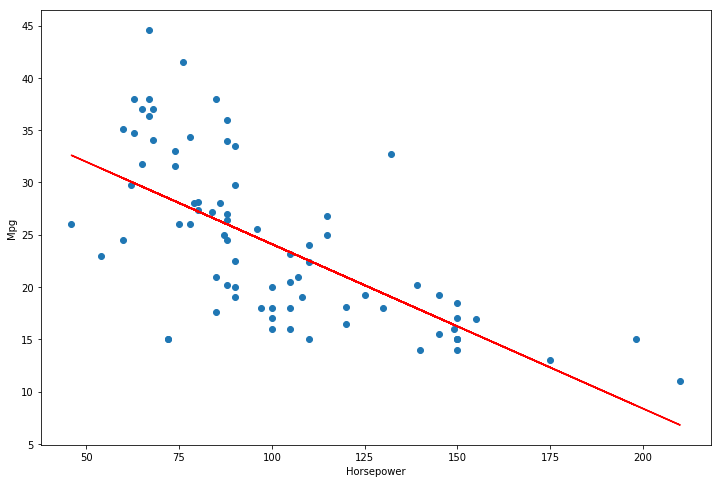

In [40]:
fig,ax=plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

Plot our test data y-pred against our test data actual y_test to see how they compare. We fit a regression line which is not far from the data points showing that our R-square is high and our model predict well the values of mpg from horsepower in our test data.

# Let us try another Linear regression with one feature: Age

In [41]:
x= automobile_df[['age']]
y= automobile_df['mpg']

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
linear_model=LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score:', linear_model.score(x_train, y_train))
y_pred=linear_model.predict(x_test)
print('Training score:', r2_score(y_test, y_pred))

Training score: 0.3496698864104526
Training score: 0.297343844276739


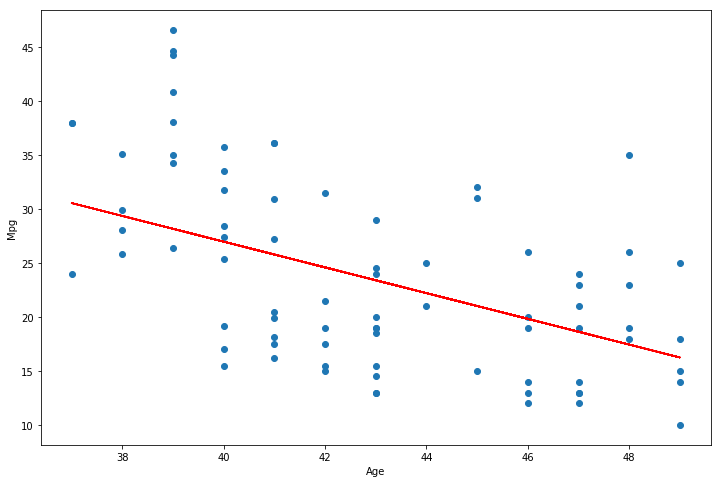

In [42]:
fig,ax=plt.subplots(figsize=(12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [43]:
from sklearn.metrics import r2_score
print('Testing score:',r2_score(y_test, y_pred))

Testing score: 0.297343844276739


# We will now do Linear Regression with multiple features

In [48]:
x=automobile_df[['displacement','horsepower','weight']]
y=automobile_df['mpg']
                 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [49]:
linear_model=LinearRegression(normalize=True).fit(x_train, y_train)

In [50]:
print('Training score:',linear_model.score(x_train, y_train))

Training score: 0.7090937189440465


In [53]:
predictors=x_train.columns
coef=pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.039452
weight         -0.005548
displacement   -0.004836
dtype: float64


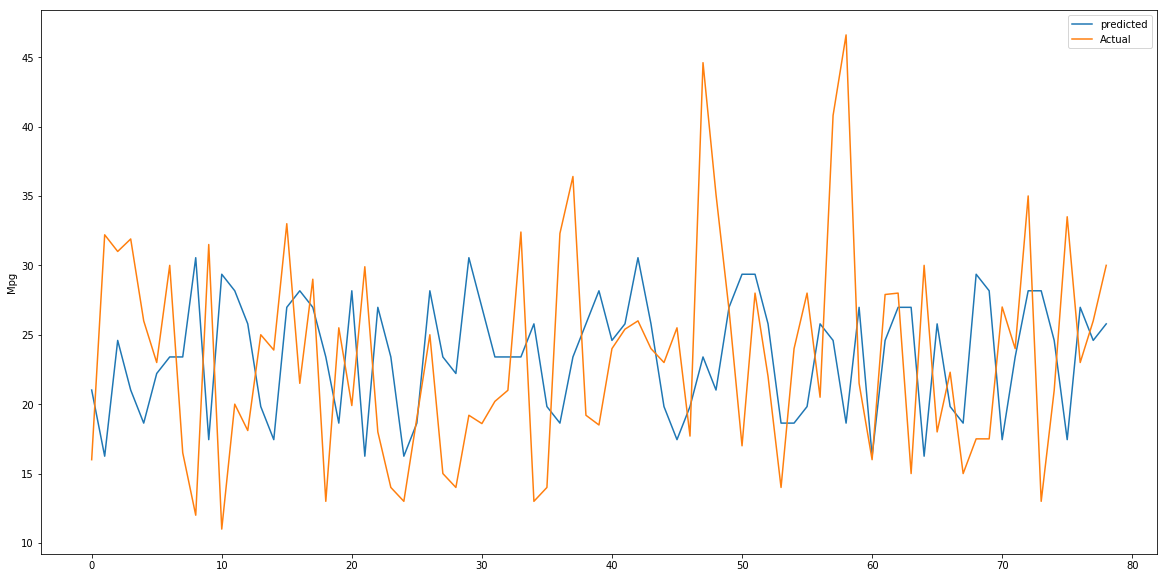

In [55]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label='predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()